In [1]:
import numpy as np                   
import pandas as pa                 
import matplotlib.pyplot as plt      
import seaborn as sn                
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco 
from sklearn.model_selection import cross_val_score

### Import Data Frame assign the name fifa
* Print out the head() or first 5 rows

In [2]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Stripped "€" and "K" from Wage
* Stripped "+" and "-" from the front of the columns
* Removed any part of the String after "+" and "-" and convert columns to float

In [3]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [4]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

In [5]:
def removeStrings (X):
    if '+' in X:
        K = X.find('+')
        return X[:K]
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else:  
        return X

In [6]:
def convertFloat(fifa, feature):
    for K in fifa.index: 
        fifa.loc[K,feature] = removeStrings(fifa.loc[K, feature])

    
    fifa.loc[:, feature] = fifa.loc[:,feature].astype("float")  
    return fifa

In [7]:
fifa = convertFloat(fifa, "Acceleration")
fifa = convertFloat(fifa, "Aggression")
fifa = convertFloat(fifa, "Agility")
fifa = convertFloat(fifa, "Balance")
fifa = convertFloat(fifa, "Ball control")

### Avalaible Columns
* Age, Overall, Potentail, Wage, Acceleration, Aggression, Agility, Balance, and Ball Control

## K- nearest neighbors

In [8]:
X = np.array(fifa[['Ball control', 'Overall']])
y = np.array(fifa.iloc[:, 7])

In [9]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [10]:
n = X.shape[0]
test = int(0.30*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]      
y_test = y[:test]
X_train = X[test:]   
y_train = y[test:]

In [11]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):
    
    h = 0.01 
    
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.6562076391278455
Testing R2: 0.6724606399121398


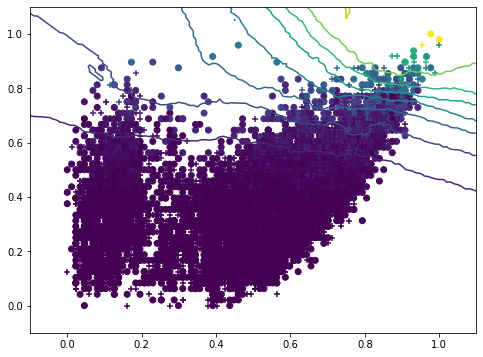

In [12]:
reg = KNeighborsRegressor(n_neighbors=100)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [13]:
knn = cross_val_score(reg, X, y, cv=20)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: 0.679004074684636
KNN Standard Deviation R2: 0.05142773318606564


In [14]:
X = np.array(fifa[['Ball control', 'Agility']])
y = np.array(fifa.iloc[:, 3])

In [15]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [16]:
n = X.shape[0]
test = int(0.30*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       
y_test = y[:test]
X_train = X[test:]     
y_train = y[test:]

Training R2: 0.5535310093846577
Testing R2: 0.48144157173367685


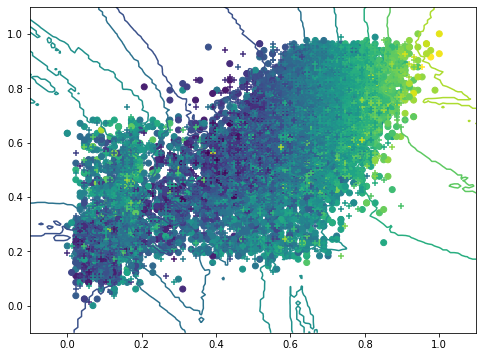

In [17]:
reg1 = KNeighborsRegressor(n_neighbors=25)
reg1.fit(X_train, y_train)
plot_reg_model(reg1, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [18]:
knn = cross_val_score(reg1, X, y, cv=20)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: 0.5059887941487327
KNN Standard Deviation R2: 0.026215521892962317


## PCA Model
* PCA Model with colums 7,8,9 vs Age

In [19]:
X = np.array(fifa.iloc[:,7:10])
y = np.array(fifa.iloc[:, 1])

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X);

import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)          
perm = rn.permutation(n)   
X = Xpca[perm]
y = y[perm]
X_test = Xpca[:test]     
y_test = y[:test]
X_train = Xpca[test:]   
y_train = y[test:]


In [20]:
cat1 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.08720154234020466, 0.06963292547274749)

In [21]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 
    
    x_min, x_max = -40.0, 40.0
    y_min, y_max = -20.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 9.537671883386167e-07
Testing R2: -0.00019381885611591265


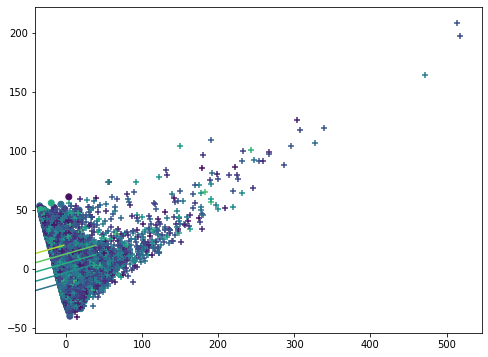

In [22]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [23]:
pca = cross_val_score(reg, X, y, cv=10)
print('PCA Mean R2: {}'.format(pca.mean()))
print('PCA Standard Deviation R2: {}'.format(pca.std()))

PCA Mean R2: 0.038487530043899085
PCA Standard Deviation R2: 0.004849330603970304


* PCA Model With Columns 10,11,12 vs Age

In [24]:
X = np.array(fifa.iloc[:,10:13])                        
y = np.array(fifa.iloc[:, 1])

pca = PCA(n_components=2) 
Xpca = pca.fit_transform(X);

import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            
perm = rn.permutation(n)   
X = Xpca[perm]
y = y[perm]
X_test = Xpca[:test]      
y_test = y[:test]
X_train = Xpca[test:]    
y_train = y[test:]


In [25]:
cat2 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat2.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.0829007860002966, 0.08832035595105674)

Training R2: 3.499562283215685e-05
Testing R2: 5.504759604502141e-05


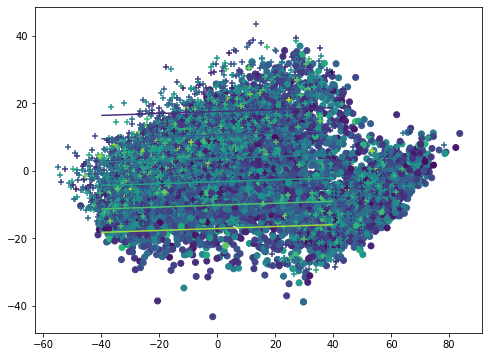

In [26]:
reg2 = LinearRegression()
reg2.fit(X_train,y_train)
plot_reg_model(reg2, X_train, y_train, X_test, y_test)
plt.show()

#### Cross Validation

In [27]:
pca = cross_val_score(reg2, X, y, cv=10)
print('PCA Mean R2: {}'.format(pca.mean()))
print('PCA Standard Deviation R2: {}'.format(pca.std()))

PCA Mean R2: 0.03386065573762811
PCA Standard Deviation R2: 0.01192131107964341


### Regression Models Liner, Ridge, and Lasso

In [28]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [29]:
def plot_reg_model(reg, X, y):


    n = X.shape[0]
    test = int(0.20*n)           
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]      
    y_test = y[:test]
    X_train = X[test:]     
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
    
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Training R2: 0.3713957702798176
Testing R2: 0.37326816357022097


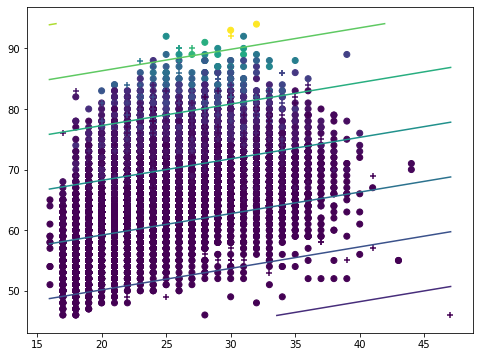

In [30]:
reg = LinearRegression()
plot_reg_model(reg, X, y)
plt.show()

Training R2: 0.36736864581959994
Testing R2: 0.38790084770779776


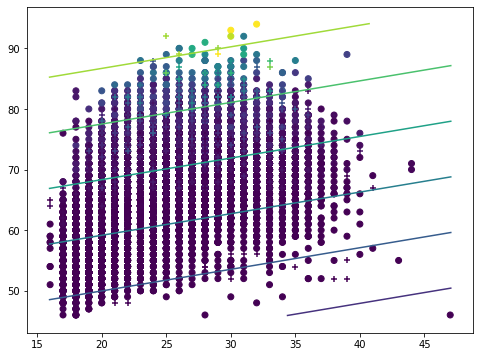

In [31]:
ridge_reg = Ridge(alpha=2)
plot_reg_model(ridge_reg, X, y)
plt.show()

Training R2: 0.37404377491332386
Testing R2: 0.36191702764978473


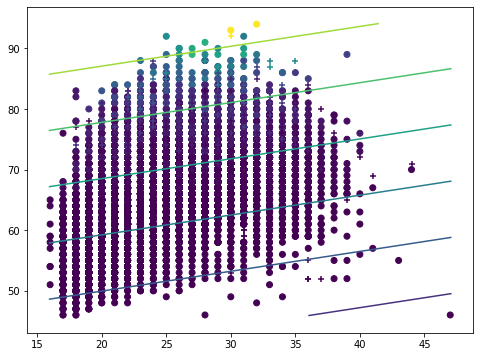

In [32]:
lasso_reg=Lasso(alpha=1)
plot_reg_model(lasso_reg, X, y)
plt.show()

Training R2: 0.7578138034179733
Testing R2: 0.7356962931842672


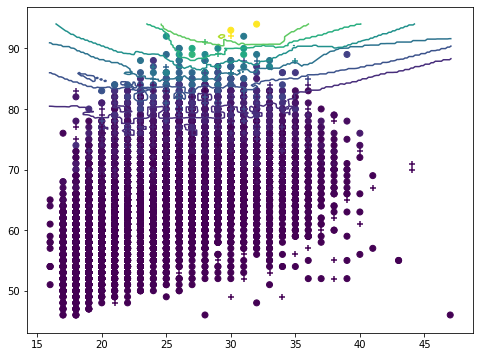

In [33]:
knn = KNeighborsRegressor(n_neighbors=10)
plot_reg_model(knn, X, y)
plt.show()

Training R2: 0.7843679888755264
Testing R2: 0.6828285938702379


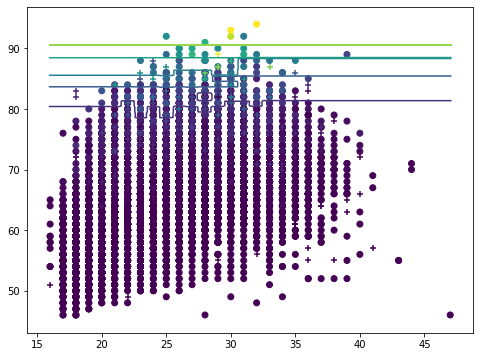

In [34]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y)
plt.show()

#### Cross Validation

In [35]:
lreg = cross_val_score(reg, X, y, cv=10)
ridge = cross_val_score(ridge_reg, X, y, cv=10)
LASSO = cross_val_score(lasso_reg, X, y, cv=10)
TREE = cross_val_score(tree, X, y, cv=10)

In [36]:
print('Linear Regression Mean R2: {}'.format(lreg.mean()))
print('Linear Regression Standard Deviation R2: {}'.format(lreg.std()))

Linear Regression Mean R2: -83.31855263403419
Linear Regression Standard Deviation R2: 237.01937423740821


In [37]:
print('Ridge Mean R2: {}'.format(ridge.mean()))
print('Ridge Standard Deviation R2: {}'.format(ridge.std()))

Ridge Mean R2: -83.31767530533001
Ridge Standard Deviation R2: 237.01691550468036


In [38]:
print('Lasso Mean R2: {}'.format(LASSO.mean()))
print('Lasso Standard Deviation R2: {}'.format(LASSO.std()))

Lasso Mean R2: -81.03511768363349
Lasso Standard Deviation R2: 230.99397781248348


In [39]:
print('Tree Mean R2: {}'.format(TREE.mean()))
print('Tree Standard Deviation R2: {}'.format(TREE.std()))

Tree Mean R2: -0.09281349373616797
Tree Standard Deviation R2: 0.093042535633659


## Nueral Networks

In [40]:
X = np.array(fifa[['Agility', 'Overall']])
y = np.array(fifa['Wage'])

In [41]:
def plot_reg_model(reg, X, y):


    n = X.shape[0]
    test = int(0.20*n)          
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]     
    y_test = y[:test]
    X_train = X[test:]   
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
   
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 
   
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

### Nueral Network Ridge Regression

Training R2: 0.35647979701777666
Testing R2: 0.3374707558532609


<function matplotlib.pyplot.show(*args, **kw)>

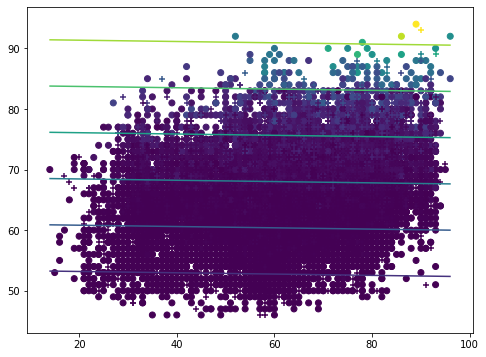

In [42]:
r_reg = Ridge(alpha=2)
plot_reg_model(r_reg, X, y)
plt.show

In [43]:
ridge = cross_val_score(r_reg, X, y, cv=10)
print('Ridge Mean R2: {}'.format(ridge.mean()))
print('Ridge Standard Deviation R2: {}'.format(ridge.std()))

Ridge Mean R2: -89.69855976614753
Ridge Standard Deviation R2: 257.05798743335174


### Nueral Network Lasso Regression

Training R2: 0.3530368497636739
Testing R2: 0.3518058180899185


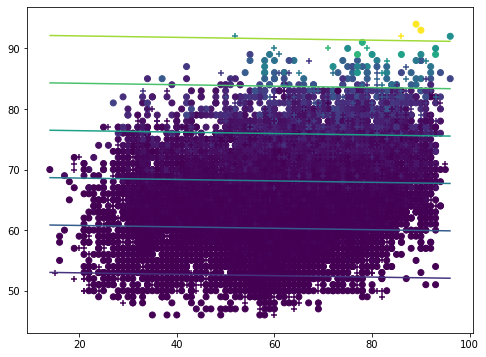

In [44]:
l_reg=Lasso(alpha=1)
plot_reg_model(l_reg, X, y)
plt.show()

In [45]:
lasso = cross_val_score(l_reg, X, y, cv=10)
print('Lasso Mean R2: {}'.format(lasso.mean()))
print('Lasso Standard Deviation R2: {}'.format(lasso.std()))

Lasso Mean R2: -86.86846732479378
Lasso Standard Deviation R2: 248.97339510556557


### Nueral Network K-nearest Neighbors Regression

Training R2: 0.7860344660431973
Testing R2: 0.7286176400172005


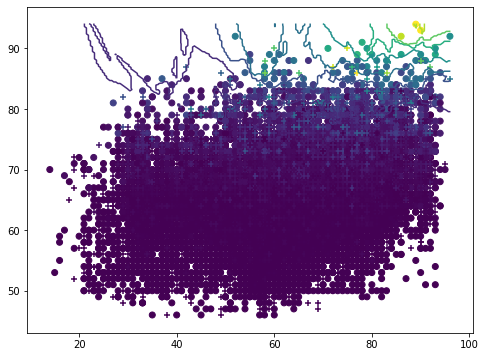

In [46]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y)
plt.show()

In [47]:
knn = cross_val_score(knn, X, y, cv=10)
print('KNN Mean R2: {}'.format(knn.mean()))
print('KNN Standard Deviation R2: {}'.format(knn.std()))

KNN Mean R2: -0.2503245935877572
KNN Standard Deviation R2: 0.11359501797490984


### Nueral Network Decision Tree Regression

Training R2: 0.8305469800057006
Testing R2: 0.7111726154988499


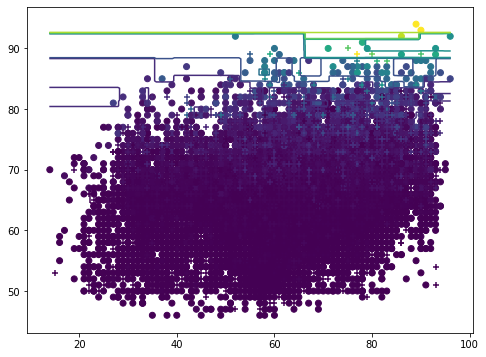

In [48]:
tree = DecisionTreeRegressor(max_depth=10)
plot_reg_model(tree, X, y)
plt.show()

In [49]:
tree = cross_val_score(tree, X, y, cv=10)
print('Tree Mean R2: {}'.format(tree.mean()))
print('Tree Standard Deviation R2: {}'.format(tree.std()))

Tree Mean R2: -0.34274207332783246
Tree Standard Deviation R2: 0.5351652962285744


### Ensemble Methods

Training R2: 0.7445158923484723
Testing R2: 0.7480881830378772


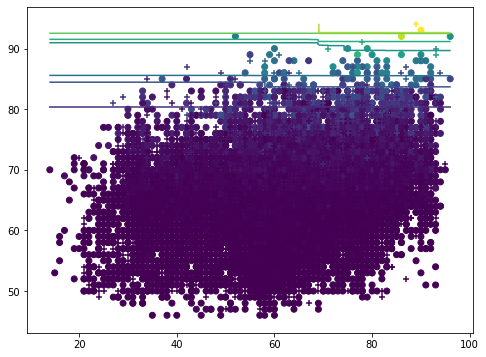

In [50]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
plot_reg_model(forest, X, y)
plt.show()

In [51]:
Ensemble = cross_val_score(forest, X, y, cv=10)
print('Ensemble Mean R2: {}'.format(Ensemble.mean()))
print('Ensemble Standard Deviation R2: {}'.format(Ensemble.std()))

Ensemble Mean R2: -0.5495563022631647
Ensemble Standard Deviation R2: 0.9346691802704287


### Gradient Boosting Esamble Network Model

Training R2: 0.8113145688490936
Testing R2: 0.7508567923642868


<function matplotlib.pyplot.show(*args, **kw)>

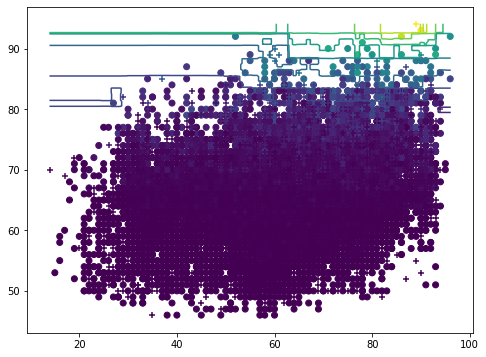

In [52]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
plot_reg_model(boost, X, y)
plt.show

In [53]:
Boost = cross_val_score(boost, X, y, cv=10)
print('Boost Mean R2: {}'.format(Boost.mean()))
print('Boost Standard Deviation R2: {}'.format(Boost.std()))

Boost Mean R2: -0.10927113584264223
Boost Standard Deviation R2: 0.13139277570036273


### Nueral Networks for Regression

In [72]:
X = np.array(fifa[['Age','Overall']])
y = np.array(fifa['Wage'])

In [73]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()  

Training R2: 0.7523901532429829
Testing R2: 0.7634988157062013


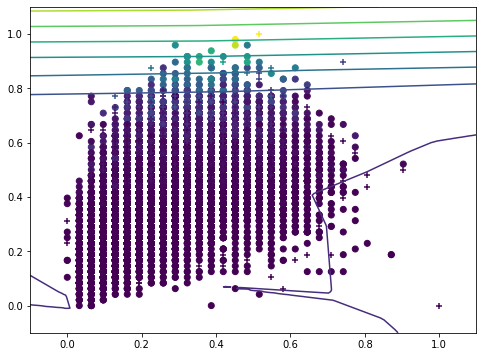

In [74]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y)
plt.show()

In [75]:
mlp = cross_val_score(mlp, X, y, cv=10)
print('MLP Mean R2: {}'.format(mlp.mean()))
print('MLP Standard Deviation R2: {}'.format(mlp.std()))

MLP Mean R2: -87.43342077855543
MLP Standard Deviation R2: 249.54346558482354


* adding an addtional layer to improve performance

Training R2: 0.7402875420609694
Testing R2: 0.793894917162876


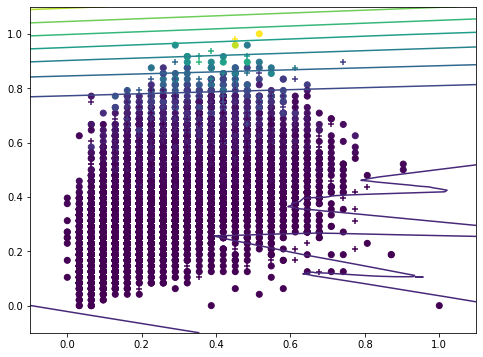

In [76]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp2, Xn, y)
plt.show()

In [77]:
mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
mlp = cross_val_score(mlp2, Xn, y, cv=4)
print('MLP Mean R2: {}'.format(mlp.mean()))
print('MLP Standard Deviation R2: {}'.format(mlp.std()))

MLP Mean R2: -0.3763555474119805
MLP Standard Deviation R2: 0.7893521449053935


#### We tried to use the new method of running the cross validation on each our models but we are getting means and standard deviations that do not make sense and are completely off from our testing and training sets. Knowing that, we will try using different methods of cross validation from the scikitlearn website to see if those will work. If those different methods do not work we will go back to computing it by hand. 

## What's next
    * Input the decision tree (Jordana)
    * Find different method of cross validation that will produce accurate values (Lee)
    * Implement newest models (Lee and Luke)
    * Run already working models against different features (Linear,Ridge, Lasso - SAM) 
        (Remainding models will be split among Lee,Jordana, and Luke)

# Cross validation

In [78]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25,
    random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))
#[9 1 6 7 3 0 5] [2 8 4]

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


In [79]:
ss = ShuffleSplit(n_splits=5, test_size=0.1).split(Xn)
score_train = []
score_test = []
for train_index, test_index in ss:
    mlp2 = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
    mlp2.fit(Xn[train_index,:],y[train_index])
    score_train+=[mlp2.score(Xn[train_index,:],y[train_index])]
    score_test+=[mlp2.score(Xn[test_index,:],y[test_index])]
score_test

[0.7432919352192233,
 0.781079912945081,
 0.8164426486353904,
 0.7787014967213421,
 0.7000182326539879]

In [80]:
score_train

[0.7564386080275608,
 0.7527995931629043,
 0.7394433907875164,
 0.7514746018898831,
 0.7607471849811362]